In [2]:
!pip install wordcloud # no need to run again and again 

ERROR: Invalid requirement: '#'


In [1]:
# Install the wordcloud library if you don't have it
# import 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re 
import nltk
from nltk.corpus import stopwords 
from collections import Counter


In [2]:
# Define two texts to compare
words_in_cv = """ Aniket G. 
E: godeani21@gmail.com | M: +44 7586 272146 | L: linkedin.com/in/aniket-gode/ | A: Edinburgh, UK 
SUMMARY  
Having recently graduated with 2nd Class Honours in MSc Data Science from the University of Sunderland, ~1 
year of Retail industry, I am actively looking for a Data Analyst role. I have the right to work in the UK. 
EDUCATION 
MSc in Data Science | University of Sunderland | 2022 – 2023 
● Modules: Data Science Fundamentals (68%), Technology Management for Organisation (60%) 
● Dissertation: Analysed Social Media Marketing trends using YouTube API (2nd) 
BEng in Computer Engineering | MU | 2017 - 2021 
● Modules: Natural Language Processing (78%), Cloud Computing (81%), Database Management-SQL 
(68%) 
● Dissertation: Developed a Crop Recommendation System using Python, MySQL, MongoDB (1st) 
WORK EXPERIENCE 
Data Analyst (Self-Employed) | September 2024 - Present | Edinburgh, UK 
● Built an ARIMA-based sales forecasting model (85% accuracy) to analyse demand trends 
● Developed Power BI & SQL dashboards to track KPIs, reducing report generation time by 40% 
● Automated data cleaning and EDA processes, cutting processing time by 30% 
● Scraped and analysed YouTube API, increasing engagement by 40% through A/B testing 
Retail Team Member | Piper Finn Ltd | January 2024 - September 2024 | Sunderland, UK 
● Promoted from part-time to full-time in 2 months  
● Managed inventory using Excel and SQL within WooCommerce, ensuring 99% stock accuracy 
● Analysed 12 months of stock movement patterns, leading to a 20% reduction in excess stock 
Data Science Intern | Unified Mentor | June 2024 - July 2024 | Sunderland, UK  
● Built an 88% accurate attrition model in Python and Power BI, improving HR decision-making by 20% 
● Automated Python-based test scripts, reducing manual data validation efforts by 30% 
Home Bargains | Store Team Member | September 2023 - January 2024 | Sunderland, UK  
● Processed hundreds of daily transactions, helping increase checkout sales efficiency by 15% 
Amazon | Warehouse Operative | October 2022 - January 2023 | Sunderland, UK 
● Ranked in the top 5 in the team for order accuracy & efficiency 
EXTRACURRICULAR ACTIVITIES  
● Personal Projects - Expanding my technical skill set through self-driven projects in data analysis, 
machine learning, and predictive modelling 
LANGUAGES, SKILLS AND CERTIFICATES  
● Languages: English (Advanced), Hindi (Native), Marathi (Native) 
● Skills: Python, SQL, Excel, Power BI, R, Machine learning, API Testing 
● Certifications: Microsoft Power BI, Data Science Bootcamp, Excel Basic for Data Analysis 



  """ # input cv

In [3]:
words_in_jd = """  Job Summary

Calero, the leading technology expense management solution for complex enterprises, is looking for a Junior MDM Analyst, in a hybrid capacity for our Cannock, Tunbridge Wells or Edinburgh office. Reporting to the Service Operations manager (SOM). You will be providing high quality market data administration, Market Data Management (MDM) inventory support and vendor management to our global managed service customers. This role is an entry level, integral, customer facing, collaborative, results oriented position where you will be provided with training opportunities and given a real chance to impact the operations of the organisation. The key activities are to ensure the costs are allocated accurately within the software, reconcile market data invoices and prepare reports on a monthly and ad hoc basis. You will become a subject matter expert in the assigned customer’s profile of market data services with a specific focus on their business. You will be promoting the managed service activities, new features and projects that may benefit the customer and increase revenues. In collaboration with your team members, you will be essential in demonstrating the value of our solutions to our customer and ensure that the managed service meets and exceeds their expectations. You will be contributing to and participating in regular service review meetings or conference calls with customers and relevant staff members.

This position is ideal for a graduate individual who likes working in a fast-paced environment, looking for a challenge and is great with numbers.

Essential Job Responsibilites

Process requests from our customers in a way that will delight them
Maintain market data inventory accurately using Calero’s cutting edge MDM software
Reconcile and process vendor invoices for payment; investigate and resolve any cost discrepancies
Support development and maintenance of bespoke client functionality
Co-ordinate software updates within our global team, including internal testing
Assist Customer in User Acceptance Testing
Prepare, monitor, verify and distribute reports on a regular basis, regarding Service Level Agreement metrics
Continuously review and audit existing processes to ensure effective performance and compliance with mutually agreed requirements and control procedures
Own all relevant documentation, including customer process documents, keeping them up to date

EDUCATION/SPECIAL LICENSES OR CERTIFICATION

Preferred degree in IT/Finance/Business related subject

Skills

Excellent Excel skills
Basic SQL skills desirable but not essential

 COMPETENCIES

Excellent verbal, written, and non-verbal communication skills
Lead by example by maintaining strong ethics, values, trust and integrity
Problem solving and technical skills
Excellent detection for errors in detailed numerical reports
recommend/take corrective action promptly and proactively
Ability to work independently and collaboratively with all levels of staff and management """ #input job_description

Common words: {'sql', 'organisation', 'managed', 'role', 'cutting', 'skills', 'analyst', 'within', 'testing', 'looking', 'summary', 'data', 'technology', 'edinburgh', 'team', 'activities', 'projects', 'management', 'basic', 'technical', 'increase', 'work', 'using', 'inventory', 'leading', 'excel', 'processes'}
Unique words in Text 1: {'mysql', 'checkout', 'learning', 'year', 'improving', 'managementsql', 'mu', 'media', 'automated', 'st', 'validation', 'reducing', 'developed', 'marathi', 'bargains', 'cloud', 'kpis', 'unified', 'ltd', 'efforts', 'g', 'home', 'honours', 'scripts', 'top', 'certifications', 'database', 'uk', 'languages', 'recently', 'fulltime', 'bootcamp', 'system', 'machine', 'processing', 'bi', 'engineering', 'store', 'excess', 'decisionmaking', 'computing', 'analyse', 'movement', 'skill', 'university', 'intern', 'graduated', 'actively', 'october', 'test', 'time', 'parttime', 'class', 'personal', 'certificates', 'increasing', 'language', 'youtube', 'promoted', 'helping', 

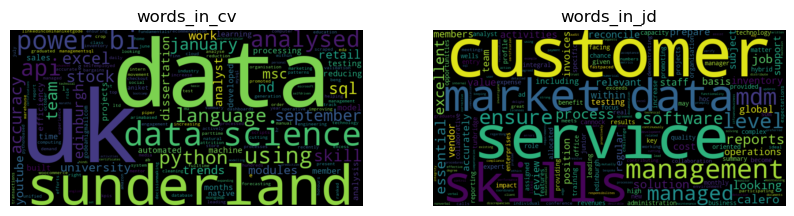


Word frequencies in CV:
data: 11
uk: 7
sunderland: 6
science: 5
power: 4
bi: 4
analysed: 3
using: 3
api: 3
python: 3

Word frequencies in JD:
service: 6
market: 5
data: 5
customer: 5
skills: 5
management: 4
customers: 4
mdm: 3
managed: 3
ensure: 3


In [4]:


# Function to preprocess text
def preprocess_text(text):
    # Remove special characters and tokenize
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # Remove non-alphabet characters
    words = text.split()  # Tokenize the text into words
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# Preprocess both texts
filtered_words1 = preprocess_text(words_in_cv)
filtered_words2 = preprocess_text(words_in_jd)

# Find common and unique words
common_words = set(filtered_words1) & set(filtered_words2)
unique_words1 = set(filtered_words1) - set(filtered_words2)
unique_words2 = set(filtered_words2) - set(filtered_words1)

# Print results
print("Common words:", common_words)
print("Unique words in Text 1:", unique_words1)
print("Unique words in Text 2:", unique_words2)

# Visualize word clouds
filtered_text1 = ' '.join(filtered_words1)
filtered_text2 = ' '.join(filtered_words2)

wordcloud1 = WordCloud(width=800, height=400).generate(filtered_text1)
wordcloud2 = WordCloud(width=800, height=400).generate(filtered_text2)

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('words_in_cv')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('words_in_jd')
plt.axis('off')

plt.show()

# Count word frequencies
word_freq1 = Counter(filtered_words1)
word_freq2 = Counter(filtered_words2)

print("\nWord frequencies in CV:")
for word, freq in word_freq1.most_common(10):  # Display top 10 most frequent words
    print(f"{word}: {freq}")

print("\nWord frequencies in JD:")
for word, freq in word_freq2.most_common(10):  # Display top 10 most frequent words
    print(f"{word}: {freq}")
